# Distance Measure for Heterogeneous Tabular Data

There has been many attempts to define a reliable distance measure for heterogeneous tabulr data (e.g., categorical, binary, and numerical features). The most notable is the Gower distance, which is a generalization of the Manhattan distance. But it is paticularly unstable when only a few features of a type are present in the data.

In the following we define a new distance metric that builds on the previous work of Gower and others. The new distance metric is based on the following principles:
1. Like the Gower, and Estabrook-rogers etc. the new distance metric is a collection of distance measures for each attribute. 
2. The distance for categorical features are based on the Hamming distance.
3. The distance for numerical and ordinal features are based on the normalised Manhattan distance.
4. Each attribute-wise distance measure is weighted by the probability of accidentally selecting the value for the attribute of the source point.

In [66]:
import uci_dataset as dataset
import seaborn as sns
from prepare_data import uci_dataset_id_import, preprocess_data

datasets = {
        'autism' : (dataset.load_autism_screening(), "Class/ASD"),
        'balance_scale' : (uci_dataset_id_import(12), "class"),
        'breast_cancer': (dataset.load_breast_cancer(), "Class"),
        'cervical_cancer': (dataset.load_cervical_cancer(), "Biopsy"),
        'cirrhosis': (uci_dataset_id_import(878), "class"),
        'credit_approval': (dataset.load_credit_approval(), "A16"),
        'cylinder_bands': (dataset.load_cylinder_bands(), "band type"),
        'dermatology': (dataset.load_dermatology(), "class"),
        'diabetic_retino': (dataset.load_diabetic(), "Class"),
        'early_diabetes': (dataset.load_early_stage_diabetes_risk(), "class"),
        'fertility': (dataset.load_fertility(), "Diagnosis"),
        'glass' : (uci_dataset_id_import(42), "class"),
        'german_credit' : (uci_dataset_id_import(144), "class"),
        'haberman': (dataset.load_haberman(), "survival"),
        'hayes_roth': (dataset.load_hayes_roth(), "class"),
        'hcv_values': (dataset.load_hcv(), "Category"),
        'heart': (uci_dataset_id_import(145), 'class'),
        'heart_disease': (dataset.load_heart_disease(), "target"),
        'hepatitis': (dataset.load_hepatitis(), "Class"),
        'indian_liver': (dataset.load_indian_liver(), "Selector"),
        'iris': (sns.load_dataset('iris'), "species"),
        'liver_disorder': (dataset.load_liver_disorders(), "selector"),
        'kidney_disease': (uci_dataset_id_import(336), "class"),
        'lymphography': (dataset.load_lymphography(), "class"),
        'mammographic': (uci_dataset_id_import(161), "class"),
        'maternal': (uci_dataset_id_import(863), "class"),
        'mushroom': (uci_dataset_id_import(73), "class"),
        'obesity_levels': (uci_dataset_id_import(544), "class"),
        'parkinsons': (dataset.load_parkinson(), "status"),
        'penguins': (sns.load_dataset('penguins'), "species"),
        'raisin': (uci_dataset_id_import(850), "class"),
        'soy_bean': (uci_dataset_id_import(90), "class"),
        'student_performance': (uci_dataset_id_import(856), "class"),
        'thoracic_surgery': (dataset.load_thoracic_surgery(), "Risk1Yr"),
        'voting' : (uci_dataset_id_import(105), "class"),
        'wisconsin_bc' : (dataset.load_breast_cancer_wis_diag(), "diagnosis"),
}

for dataset_name, (data, target_col) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    df, cat_cols,_ = preprocess_data(data, target_col)
    print(f"Number of rows: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    print(f"Number of columns are cat: {len(cat_cols)}")
    print(f"Number of class levels: {len(df['class'].unique())}")


Dataset: autism
Number of rows: 702
Number of columns: 21
Number of columns are cat: 19
Number of class levels: 2

Dataset: balance_scale
Number of rows: 625
Number of columns: 5
Number of columns are cat: 5
Number of class levels: 3

Dataset: breast_cancer
Number of rows: 277
Number of columns: 10
Number of columns are cat: 10
Number of class levels: 2

Dataset: cervical_cancer
Number of rows: 59
Number of columns: 36
Number of columns are cat: 26
Number of class levels: 2

Dataset: cirrhosis
Number of rows: 312
Number of columns: 18
Number of columns are cat: 12
Number of class levels: 3

Dataset: credit_approval
Number of rows: 653
Number of columns: 16
Number of columns are cat: 10
Number of class levels: 2

Dataset: cylinder_bands
Number of rows: 277
Number of columns: 39
Number of columns are cat: 24
Number of class levels: 2

Dataset: dermatology
Number of rows: 358
Number of columns: 35
Number of columns are cat: 34
Number of class levels: 6

Dataset: diabetic_retino
Number of

In [19]:
# Load datasets
import uci_dataset as dataset
import seaborn as sns
from prepare_data import _clean_up_data, uci_dataset_id_import, preprocess_data

ID_nums = [ 44, 53, 174, 42, 95, 342, 212, 763, 39, 52, 292, 887, 537, 451, 16, 176, 43, 545, 149, 151, 110, 379, 186, 267, 146, 147, 80, 563, 107, 186]
ID_diff = [1, 257, 12, 14, 143, 15, 17, 145, 144, 22, 544, 161, 419, 73, 336, 83, 856, 857, 90, 101, 105, 244]

df = uci_dataset_id_import(105, silent_import=False)
# df = dataset.load_dermatology()
# df = sns.load_dataset('titanic')

print("Number of rows:", df.shape[0])
df,_,_ = preprocess_data(df, 'class')
# _clean_up_data(df, 'class')
df.head()
# df['class'].value_counts()

Dataset Name: Congressional Voting Records
Number of rows: 435


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,class
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [64]:
import pandas as pd
df = pd.read_csv("01_knn_cls_results.csv")

# grab the part ot he dataframe with balanced type
# df = df[df['type']=='most_cats']

# take the dataframe, make accuracy, precision and recall columns into long format
df = df.melt(id_vars=['df_name', 'method'], value_vars=['accuracy', 'precision', 'recall', 'f1_score', 'error_rate', 'roc_auc',],
             var_name='metric', value_name='value')
df
# df.rename({'df_name'})

,df_name,method,metric,value
0,lymphography,L2,accuracy,0.768618
1,lymphography,L2_OHE,accuracy,0.860992
2,lymphography,GOW,accuracy,0.845814
3,lymphography,HEOM,accuracy,0.825575
4,lymphography,HVDM,accuracy,0.801584
...,...,...,...,...
1465,voting,GOW,roc_auc,0.961271
1466,voting,HEOM,roc_auc,0.961271
1467,voting,HVDM,roc_auc,0.980005
1468,voting,GEM,roc_auc,0.961271


accuracy: Friedman test statistic: 14.832618025751072, p-value = 0.021599292734473467
precision: Friedman test statistic: 15.588486140724918, p-value = 0.016141714832243338
recall: Friedman test statistic: 14.555555555555474, p-value = 0.024009939425139192
f1_score: Friedman test statistic: 13.03624733475473, p-value = 0.04246393400733642
error_rate: Friedman test statistic: 14.892039258451463, p-value = 0.021113232949766133
roc_auc: Friedman test statistic: 10.563645887899344, p-value = 0.10283554932699776


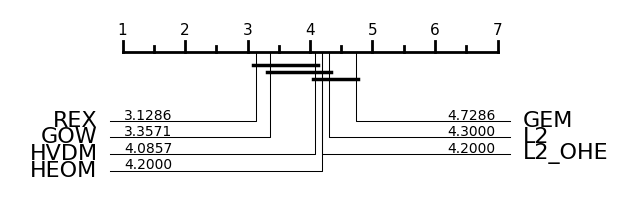

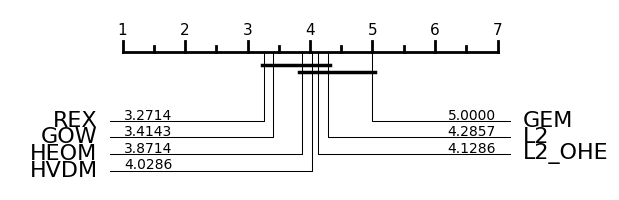

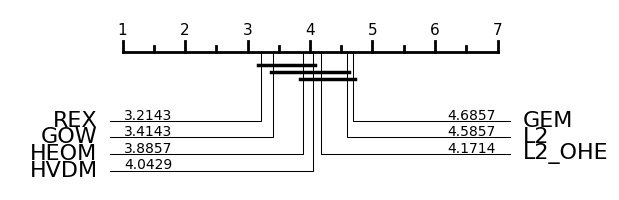

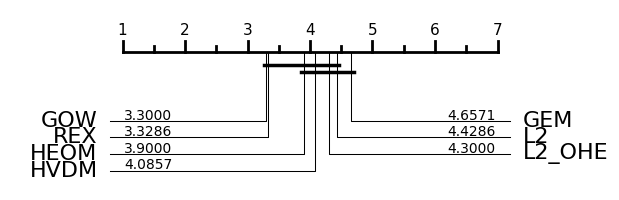

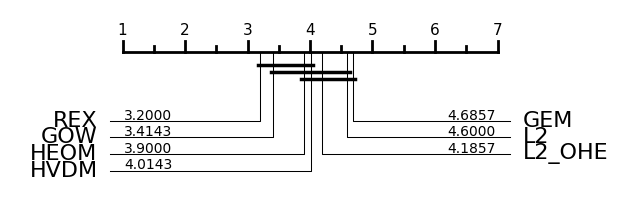

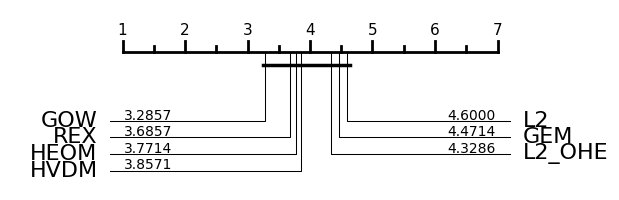

In [ ]:
import matplotlib.pyplot as plt
from aeon.visualisation import plot_critical_difference
from scipy.stats import friedmanchisquare

rcp = {'font.size': 10, 'font.family': 'sans', "mathtext.fontset": "dejavuserif"}
plt.rcParams.update(**rcp)

treatment_names = df["method"].unique()
diagram_names = df["metric"].unique()

for n in diagram_names:
    diagram_df = df[df.metric == n].pivot(
        index = "df_name",
        columns = "method",
        values = "value"
    )[treatment_names] # ensure a fixed order of treatments

    pvals = plot_critical_difference(
        diagram_df.values, 
        diagram_df.columns.tolist(), 
        lower_better=False,              # Set to True if lower is better
        test='wilcoxon',  # or nemenyi
        correction='holm', # or bonferroni or none
        width=6,
        alpha=0.05,
        reverse=False,
        return_p_values=False,
    )

    friedman_stat, p_value = friedmanchisquare(*diagram_df.T.values)
    print(f"{n}: Friedman test statistic: {friedman_stat}, p-value = {p_value}")

    # resize the figure and crop white space
    plt.gca()
    plt.gcf().set_size_inches(6, 1.8)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

    plt.savefig(f'plots/cdd_{n}.pdf', bbox_inches='tight')

In [ ]:
# from critdd import Diagrams # Diagrams is the 2D version of Diagram

import numpy as np
from scipy.stats import friedmanchisquare

# construct a sequence of CD diagrams
treatment_names = df["method"].unique()
diagram_names = df["metric"].unique()
Xs = [] # collect an (n,k)-shaped matrix for each diagram
for n in diagram_names:
    diagram_df = df[df.metric == n].pivot(
        index = "df_name",
        columns = "method",
        values = "value"
    )[treatment_names] # ensure a fixed order of treatments
    Xs.append(diagram_df.to_numpy())
    print(f"{n}: ",friedmanchisquare(*diagram_df.T.values))
two_dimensional_diagram = Diagrams(
    np.stack(Xs),
    diagram_names = diagram_names,
    treatment_names = treatment_names,
    maximize_outcome = True
)

# customize the style of the plot and export to PDF
two_dimensional_diagram.to_file(
    "02_nn_cls_critdd.pdf",
    preamble = "\n".join([ # colors are defined before \begin{document}
        "\\definecolor{color1}{HTML}{84B818}",
        "\\definecolor{color2}{HTML}{D18B12}",
        "\\definecolor{color3}{HTML}{1BB5B5}",
        "\\definecolor{color4}{HTML}{F85A3E}",
        "\\definecolor{color5}{HTML}{4B6CFC}",
        "\\definecolor{color6}{HTML}{FF69B4}",
        "\\definecolor{color7}{HTML}{F8A300}",
    ]),
    axis_options = { # style the plot
        "cycle list": ",".join([ # define the markers for treatments
            "{color1,mark=*}",
            "{color2,mark=diamond*}",
            "{color3,mark=triangle,semithick}",
            "{color4,mark=square,semithick}",
            "{color5,mark=pentagon,semithick}",
            "{color6,mark=oplus,semithick}",
            "{color7,mark=star,semithick}",
        ]),
        "width": "\\axisdefaultwidth",
        "height": "0.75*\\axisdefaultheight",
        # "title": "Nearest neighbour classification",
    },
)

accuracy:  FriedmanchisquareResult(statistic=13.334725848563929, pvalue=0.038017924393860834)
precision:  FriedmanchisquareResult(statistic=14.124223602484404, pvalue=0.028278884133288943)
recall:  FriedmanchisquareResult(statistic=14.256410256410197, pvalue=0.026899449040556973)
f1_score:  FriedmanchisquareResult(statistic=12.378881987577582, pvalue=0.0540308944963975)
error_rate:  FriedmanchisquareResult(statistic=14.256382978723316, pvalue=0.026899726992621324)
roc_auc:  FriedmanchisquareResult(statistic=9.003054989816622, pvalue=0.17340633332246594)


### Old stuff

In [101]:
# split data
from sklearn.model_selection import train_test_split

# encode categorical features
from sklearn.preprocessing import OrdinalEncoder

def encode_categorical_features(df, cat_features):
    encoder = OrdinalEncoder()
    df[cat_features] = encoder.fit_transform(df[cat_features])
    return df

def get_categorical_features(df, unique_threshold=10):
    cat_features = df.select_dtypes(include=['object']).columns.tolist()

    for col in df.select_dtypes(include=['int', 'float']).columns:
        if df[col].nunique() <= unique_threshold:
            cat_features.append(col)
    return cat_features

def split_data(df, test_size=0.2, random_state=42):  
    # Split the data into train and test sets
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)
    return train, test

def process_data(df, class_col='class'):
    cat_features = get_categorical_features(df)
    print("Categorical features:", cat_features)
    df = encode_categorical_features(df, cat_features)
    
    df = df.dropna()
    df = df[[class_col] + [col for col in df.columns if col != class_col]]
    cat_features.remove(class_col)

    train, test = split_data(df)
    return train, test, cat_features

train, test, cat_cols = process_data(d3, 'NSP')

print("Train set shape:", train.shape)
print("Test set shape:", test.shape)

Categorical features: ['NSP', 'DS', 'Nzeros', 'Tendency', 'CLASS']
Train set shape: (1700, 23)
Test set shape: (426, 23)


In [102]:
from sklearn.metrics import accuracy_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train.iloc[:, 1:], train.iloc[:,0])
preds = neigh.predict(test.iloc[:, 1:])

f1_score(test.iloc[:,0], preds, average='macro')

0.8110040156190678

In [103]:
# use gower distance
import gower

def gower_knn(train, test, k=3):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    
    # Compute the Gower distance matrix
    gower_train = gower.gower_matrix(train.iloc[:, 1:], train.iloc[:, 1:])
    gower_test = gower.gower_matrix(test.iloc[:, 1:], train.iloc[:, 1:])
    print(gower_test.shape)
    
    # Fit the model
    knn.fit(gower_train, train.iloc[:, 0])
    
    # Predict the labels for the test set
    predictions = knn.predict(gower_test)
    return predictions

preds = gower_knn(train, test, k=3)

f1_score(test.iloc[:,0], preds, average='macro')

(426, 1700)


0.9043687560648586

In [58]:
import numpy as np
import pandas as pd

def _scott_ref_rule(samples):
    """Function for doing the Scott reference rule to calcualte number of bins needed to 
    represent the nummerical values.
    
    Args:
        samples (array-like) : The data to be binned.
    
    Returns:
        array : bin edges
    
    Example:
        >>> _scott_ref_rule([1,2,3,4,5])
        array([1., 2., 3., 4., 5.])
    """
    std = np.std(samples)
    n = len(samples)
    bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)

    min_edge = min(samples); max_edge = max(samples)
    N = min(abs(int((max_edge-min_edge)/bin_width)),10000); Nplus1 = N + 1
    return np.linspace(min_edge, max_edge, Nplus1)

def lautrup_distance_matrix(df_x, df_y=None, cat_features=None):
    """
    Compute the Lautrup distance matrix between two dataframes.
    """

    # join the datasets
    if df_y is None:
        df_y = df_x
    df = pd.concat((df_x,df_y), axis=0)

    num_features = [col for col in df.columns if col not in cat_features]

    normalisation, feat_range = {}, {}
    for col in num_features:
        if np.issubdtype(df[col].dtype, np.floating):
            normalisation[col] = 1-1/(max(len(_scott_ref_rule(df[col])),2)-1)
        else:
            normalisation[col] = 1-1/df[col].nunique()

        feat_range[col] = df[col].max()-df[col].min()

    for col in cat_features:
        normalisation[col] = 1-1/df[col].nunique()

    # create the distance matrix
    dist_matrix = np.zeros((len(df_x), len(df_y)))

    for i, row in enumerate(df_x.iterrows()):
        for j, col in enumerate(df_y.iterrows()):
            for col_name in num_features:
                dist_matrix[i,j] += normalisation[col_name]*np.abs(row[1][col_name] - col[1][col_name]) / feat_range[col_name]
            for col_name in cat_features:
                if row[1][col_name] != col[1][col_name]:
                    dist_matrix[i,j] += normalisation[col_name]
    return dist_matrix

def lautrup_knn(train, test, k=3, cat_features=None):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    
    # Compute the Gower distance matrix
    _train = lautrup_distance_matrix(train.iloc[:, 1:], train.iloc[:, 1:], cat_features)
    _test = lautrup_distance_matrix(test.iloc[:, 1:], train.iloc[:, 1:], cat_features)
    print(_test.shape)
    
    # Fit the model
    knn.fit(_train, train.iloc[:, 0])
    
    # Predict the labels for the test set
    predictions = knn.predict(_test)
    return predictions

cat_vars = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']
preds = lautrup_knn(train, test, k=3, cat_features=cat_vars)

f1_score(test.iloc[:,0], preds, average='macro')

C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_13092\4047891434.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_13092\4047891434.py:20: RuntimeWarning: invalid value encountered in cast
  bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)


(56, 221)


0.5579559617781471

In [104]:
import numpy as np
import pandas as pd

from numpy import ndarray
from pandas import Series

def _scott_ref_rule(samples):
    """Function for doing the Scott reference rule to calcualte number of bins needed to 
    represent the nummerical values.
    
    Args:
        samples (array-like) : The data to be binned.
    
    Returns:
        array : bin edges
    
    Example:
        >>> _scott_ref_rule([1,2,3,4,5])
        array([1., 2., 3., 4., 5.])
    """
    std = np.std(samples)
    n = len(samples)
    bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)

    min_edge = min(samples); max_edge = max(samples)
    N = min(abs(int((max_edge-min_edge)/bin_width)),10000); Nplus1 = N + 1
    return np.linspace(min_edge, max_edge, Nplus1)

def prob_reroll_cat(counts: Series, target: int):
    """Calculate the probability of rolling a categorical variable into the target variable."""
    return counts.get(target, 0)

def prob_reroll_num(histogram: ndarray, binning: ndarray,  target: float):
    """Calculate the probability of rolling a numerical variable into the target variable."""
    # Get the counts of each bin in the variable
    
    bin_index = np.digitize(target, binning) - 1
    if bin_index < 0 or bin_index >= len(histogram):
        return 0
    prob = histogram[bin_index] / sum(histogram)
    return prob

def rerollers_distance_matrix(df_x, df_y=None, cat_features=None):
    """
    Compute the rerollers distance matrix between two dataframes.
    (the chance that randomly resampling the variable will make it into the target variable)
    """

    # join the datasets
    if df_y is None:
        df_y = df_x
    df = pd.concat((df_x,df_y), axis=0)

    num_features = [col for col in df.columns if col not in cat_features]

    bin_range, histogram, feat_range = {}, {}, {}
    for col in num_features:
        if np.issubdtype(df[col].dtype, np.floating):
            bin_range[col] = _scott_ref_rule(df[col])
            histogram[col] = np.histogram(df[col], bins=bin_range[col])[0]
        else:
            bin_range[col] = np.arange(df[col].nunique()+1)
            histogram[col] = np.histogram(df[col], bins=bin_range[col])[0]
            
        feat_range[col] = df[col].max()-df[col].min()
    
    cat_counts = {}
    for col in cat_features:
        cat_counts[col] = df[col].value_counts(normalize=True)

    # create the distance matrix
    dist_matrix = np.zeros((len(df_x), len(df_y)))

    for i, row in enumerate(df_x.iterrows()):
        for j, col in enumerate(df_y.iterrows()):
            for col_name in num_features:
                dist_matrix[i,j] += (1-prob_reroll_num(histogram[col_name], bin_range[col_name], j))*np.abs(row[1][col_name] - col[1][col_name]) / feat_range[col_name]
            for col_name in cat_features:
                if row[1][col_name] != col[1][col_name]:
                    dist_matrix[i,j] += (1-prob_reroll_cat(cat_counts[col_name], j))
    return dist_matrix

def reroll_knn(train, test, k=3, cat_features=None):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed')
    
    # Compute the Gower distance matrix
    _train = rerollers_distance_matrix(train.iloc[:, 1:], train.iloc[:, 1:], cat_features)
    _test = rerollers_distance_matrix(test.iloc[:, 1:], train.iloc[:, 1:], cat_features)
    print(_test.shape)
    
    # Fit the model
    knn.fit(_train, train.iloc[:, 0])
    
    # Predict the labels for the test set
    predictions = knn.predict(_test)
    return predictions

preds = reroll_knn(train, test, k=3, cat_features=cat_cols)

f1_score(test.iloc[:,0], preds, average='macro')

C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_13092\3680320830.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)
C:\Users\lautrup\AppData\Local\Temp\1\ipykernel_13092\3680320830.py:23: RuntimeWarning: invalid value encountered in cast
  bin_width = np.ceil(n**(1/3) * std / (3.5 * (np.percentile(samples, 75) - np.percentile(samples, 25)))).astype(int)


(426, 1700)


0.9545681900554648